# Analysis

Not the predict thing, the thing that generates a series of images and does things with similarity and stuff

**DO NOT CLICK RUN ALL - It'll do you no good**

In [1]:
# imports
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
from tqdm import tqdm

from model import CycleGan, GenType
from loader import Sampler, Loader

In [2]:
# setup and loading networks

from typing import List


gens = [
    [GenType.UNET, "./run/0004/weights/weights-21.h5"],
    [GenType.RESNET, "./run/0005-RESNET/weights/weights-65.h5"],
    [GenType.DEFORMDENS, "./run/0010-DEFORM-DENS/weights/weights-60.h5"],
    [GenType.HCDENS, "./run/0012-DENS/weights/weights-72.h5"],
    [GenType.HCDENS, "./run/0017-DENSENET-MSLE/weights/weights-80.h5"]
]

gans:List[CycleGan] = []
for t, loc in tqdm(gens):
    gan = CycleGan(genType=t)
    gan.loadCombinedFromCheckpoint(loc)
    gans.append(gan)

100%|██████████| 5/5 [00:16<00:00,  3.35s/it]


In [3]:
# other things and setup

from typing import List

loader = Loader(None, None)
sampler = Sampler("./data/simkai.ttf")

def getimg(i):
    im = loader.imread(i, cv2.IMREAD_ANYCOLOR)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def getImages(string, gans, columns=-1, vert=False):
    out: List[np.ndarray] = []
    originals = np.array(sampler.generateImages(string))
    for gan in tqdm(gans):
        converted = gan.predict(sampler, string)
        if vert:
            stitched = sampler.stitchImagesVert(converted, columns=len(string) if columns == -1 else columns)
        else:
            stitched = sampler.stitchImages(converted, columns=len(string) if columns == -1 else columns)
        out.append(stitched)
    return originals, out

# Automatic Generation

Automatically generate strings from all loaded networks and save to images/genRuns

In [5]:
def generateImages(string, gans, columns=-1, vert=False):
    # generate images
    orig, cvtd = getImages(string, gans, columns, vert=vert)
    if vert:
        origstitched = sampler.stitchImagesVert(orig, columns=len(string) if columns == -1 else columns)
    else:
        origstitched = sampler.stitchImages(orig, columns=len(string) if columns == -1 else columns)
    
    # save images
    outPath = "./images/genRuns/"
    cv2.imwrite(outPath + "-原-" + string + ".png", origstitched)
    for i, im in enumerate(cvtd):
        nom = gens[i][1].split("/")[2] + string + ".png"
        cv2.imwrite(outPath + nom, im*255)
        
    # plot images
    plt.figure()
    plt.imshow(origstitched)

    for im in cvtd:
        plt.figure()
        plt.imshow(im)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (14, 128, 128, 3)
1/1 [==============================] - 0s 442ms/step


 20%|██        | 1/5 [00:00<00:02,  1.98it/s]

Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 1s 637ms/step


 40%|████      | 2/5 [00:01<00:01,  1.59it/s]

Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 3s 3s/step


 60%|██████    | 3/5 [00:04<00:03,  1.95s/it]

Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 0s 278ms/step


 80%|████████  | 4/5 [00:05<00:01,  1.33s/it]

Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 0s 286ms/step


100%|██████████| 5/5 [00:05<00:00,  1.09s/it]

Output shape: (14, 128, 128, 3)


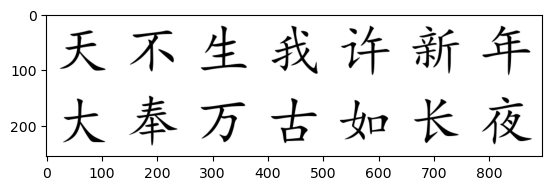

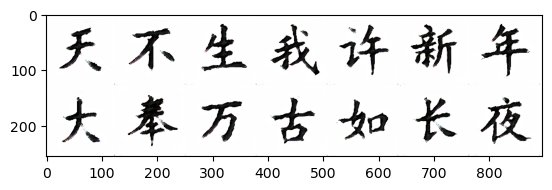

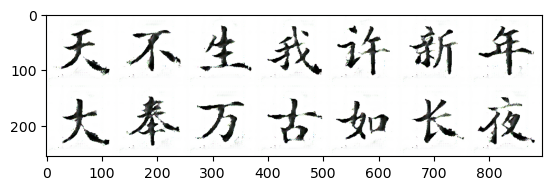

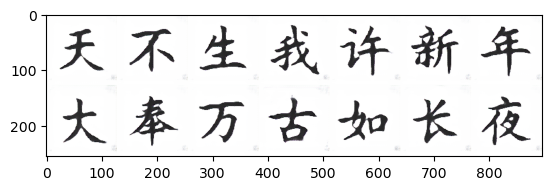

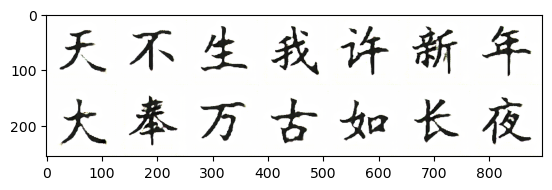

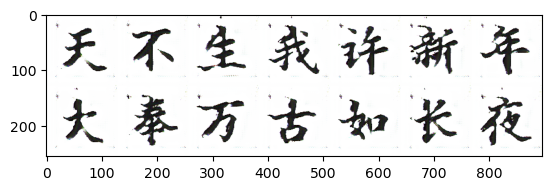

In [6]:
# string = "问答"
# string = "四體不勤五穀不分"
# string = "二简将餐简化为歺"
string = "天不生我许新年大奉万古如长夜"

generateImages(string, gans, columns=7)

# Manual Generation

Manually go through each step

In [4]:
# generated images

orig, cvtd = getImages("以神经网络写书法", gans)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 315ms/step


 20%|██        | 1/5 [00:00<00:01,  2.54it/s]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 1s 520ms/step


 40%|████      | 2/5 [00:00<00:01,  2.05it/s]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 3s 3s/step


 60%|██████    | 3/5 [00:04<00:03,  1.84s/it]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 282ms/step


 80%|████████  | 4/5 [00:04<00:01,  1.25s/it]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 254ms/step


100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

Output shape: (8, 128, 128, 3)


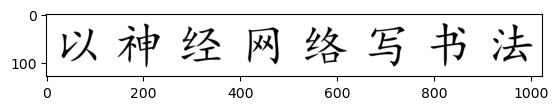

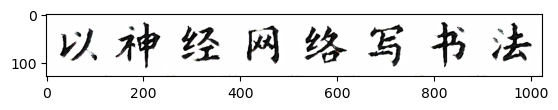

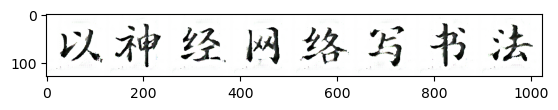

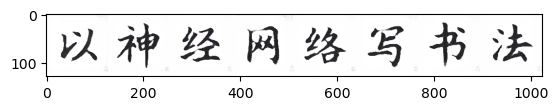

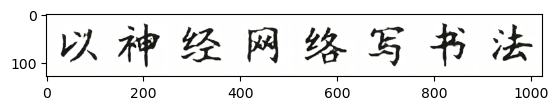

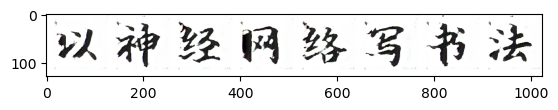

In [5]:
plt.figure()
plt.imshow(sampler.stitchImages(orig, columns=8))

for im in cvtd:
    plt.figure()
    plt.imshow(im)

In [10]:
outPath = "./images/genRuns/"

for i, im in enumerate(cvtd):
    nom = gens[i][1].split("/")[2] + ".png"
    cv2.imwrite(outPath + nom, im*255)

# VGG16

Testing similarity using metrics such as SSIM and cosine similarity of VGG16 neural style transfer similarity

In [13]:
from glob import glob

string = "永和九年嵗"

originals = sampler.generateImages(string) / 255

references = []

for path in glob("./data/b/*")[:5]:
    img = loader.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128,128), interpolation=cv2.INTER_CUBIC)
    img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    references.append(img)

references = np.array(references)

ganOuts = []

for gan in tqdm(gans):
    converted = gan.predict(sampler, string)
    ganOuts.append(converted)
    
ganOuts = np.array(ganOuts)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 317ms/step


 20%|██        | 1/5 [00:00<00:01,  2.68it/s]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 1s 774ms/step


 40%|████      | 2/5 [00:01<00:01,  1.59it/s]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 3s 3s/step


 60%|██████    | 3/5 [00:03<00:03,  1.60s/it]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 254ms/step


 80%|████████  | 4/5 [00:04<00:01,  1.09s/it]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 247ms/step


100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

Output shape: (5, 128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

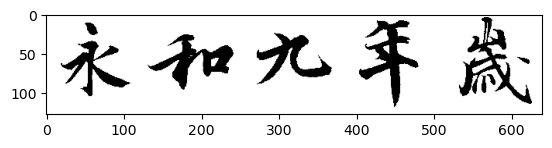

In [17]:
from glob import glob

string = "永和九年嵗"

originals = sampler.generateImages(string) / 255

references = []

p = glob("./data/b/*")
p.sort()
for path in p[:5]:
    img = loader.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128,128), interpolation=cv2.INTER_CUBIC)
    img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    references.append(img)

references = np.array(references)

stitched = sampler.stitchImages(references, columns=5)

plt.imshow(stitched)
cv2.imwrite("./images/genRuns/-书法-永和九年嵗.png", stitched*255)

In [9]:
a = glob("./data/b/*")
a.sort()
a

['./data/b/0001.jpg',
 './data/b/0002.jpg',
 './data/b/0003.jpg',
 './data/b/0004.jpg',
 './data/b/0005.jpg',
 './data/b/0006.jpg',
 './data/b/0007.jpg',
 './data/b/0008.jpg',
 './data/b/0009.jpg',
 './data/b/0010.jpg',
 './data/b/0011.jpg',
 './data/b/0012.jpg',
 './data/b/0013.jpg',
 './data/b/0014.jpg',
 './data/b/0015.jpg',
 './data/b/0016.jpg',
 './data/b/0017.jpg',
 './data/b/0018.jpg',
 './data/b/0019.jpg',
 './data/b/0020.jpg',
 './data/b/0021.jpg',
 './data/b/0022.jpg',
 './data/b/0023.jpg',
 './data/b/0024.jpg',
 './data/b/0025.jpg',
 './data/b/0026.jpg',
 './data/b/0027.jpg',
 './data/b/0028.jpg',
 './data/b/0029.jpg',
 './data/b/0030.jpg',
 './data/b/0031.jpg',
 './data/b/0032.jpg',
 './data/b/0033.jpg',
 './data/b/0034.jpg',
 './data/b/0035.jpg',
 './data/b/0036.jpg',
 './data/b/0037.jpg',
 './data/b/0038.jpg',
 './data/b/0039.jpg',
 './data/b/0040.jpg',
 './data/b/0041.jpg',
 './data/b/0042.jpg',
 './data/b/0043.jpg',
 './data/b/0044.jpg',
 './data/b/0045.jpg',
 './data/b

In [18]:
import tensorflow as tf
keras = tf.keras 
from keras.applications import VGG16
from keras.models import Model

# vgg16
vgg16 = VGG16(weights="imagenet",
              include_top=True, 
              pooling="max",
              input_shape=(224,224,3))  # has to be 224 224
# extract fc2 layer
baseModel = Model(inputs=vgg16.input,
                  outputs=vgg16.get_layer("fc2").output)

baseModel.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [19]:
import scipy

def getFeatureVec(im):
    im1 = cv2.resize(im, (224,224), interpolation=cv2.INTER_CUBIC)
    fv = baseModel.predict(im1.reshape(1, 224,224,3))
    return fv
    
def calculateCosSimilarity(a, b):
    """Calculates the cosine similarity: how close in angle terms the two vectors are"""
    return 1 - scipy.spatial.distance.cosine(a, b)

def calculateSSD(a,b):
    """calcualtes sum of squared differences"""
    return np.sum(np.square(a - b))

# calculate similarity
reference_fvs = [np.squeeze(getFeatureVec(i).transpose(), axis=-1) for i in references]

cosine_sims = []
ssd_sims = []

for _, genImages in enumerate(ganOuts):
    im_cosine_sims = []
    im_ssd_sims = []
    for i, im in enumerate(genImages):
        translated_fv = getFeatureVec(im).transpose().squeeze(-1)
        im_cosine_sims.append(calculateCosSimilarity(translated_fv, reference_fvs[i]))
        im_ssd_sims.append(calculateSSD(translated_fv, reference_fvs[i]))

    ssd_sims.append((np.mean(im_ssd_sims), im_ssd_sims))
    cosine_sims.append((np.mean(im_cosine_sims), im_cosine_sims))
    
print("\nCOSINE SIMS\n")
for i in cosine_sims: print(i)
print("\nSSD DIFFS\n")
for i in ssd_sims: print(i)

1/1 [==============================] - 0s 18ms/step

COSINE SIMS

(0.9916312336921692, [0.9932922720909119, 0.9919400811195374, 0.9880711436271667, 0.9910592436790466, 0.9937934279441833])
(0.990368640422821, [0.9906834959983826, 0.9918495416641235, 0.9881232976913452, 0.9882708787918091, 0.9929159879684448])
(0.9880677938461304, [0.9854650497436523, 0.9877055883407593, 0.9873894453048706, 0.9889921545982361, 0.9907867312431335])
(0.9883782625198364, [0.9865697026252747, 0.9870595932006836, 0.9882408380508423, 0.9878526329994202, 0.9921685457229614])
(0.987072765827179, [0.9853345155715942, 0.9896643757820129, 0.9848341941833496, 0.9851287007331848, 0.9904020428657532])

SSD DIFFS

(38.804688, [32.319824, 37.826576, 55.873913, 40.347366, 27.65576])
(45.10286, [46.14276, 38.647144, 55.629005, 53.461914, 31.633469])
(55.46278, [70.2706, 57.196556, 59.112526, 49.819946, 40.914276])
(54.01774, [64.7078, 60.449524, 55.082413, 55.04007, 34.808853])
(59.83904, [70.22673, 48.03185, 70.932045, 

In [20]:
from skimage.metrics import structural_similarity as ssim 

ssimSims = []

for genResult in ganOuts:
    singleSSIMs = []
    for i, im in enumerate(genResult):
        singleSSIMs.append(ssim(im, references[i], channel_axis=2))
    ssimSims.append((np.mean(singleSSIMs), singleSSIMs))
    
print("\nSSIM SIMILARITIES\n")
for i in ssimSims: print(i)


SSIM SIMILARITIES

(0.6390398, [0.68277425, 0.65021586, 0.64660484, 0.6508055, 0.5647987])
(0.61098796, [0.6480779, 0.61877006, 0.6109754, 0.625744, 0.5513726])
(0.63537925, [0.6748509, 0.64495915, 0.64227366, 0.65171456, 0.56309825])
(0.63619405, [0.6859103, 0.64154965, 0.64946145, 0.6398225, 0.5642263])
(0.6139783, [0.65518177, 0.61521727, 0.63267654, 0.62494403, 0.54187196])


In [21]:
print("Cosine similarity: higher the better ; SSD difference, the lower the better ; SSIM is SSIM")
for i in range(len(cosine_sims)):
    print(f"Gen {gens[i][0]} : [avg cos-sim {cosine_sims[i][0]:.5f}] [avg ssd-dif {ssd_sims[i][0]:.3f}] [avg image-ssim {ssimSims[i][0]:.4f}]")

Cosine similarity: higher the better ; SSD difference, the lower the better ; SSIM is SSIM
Gen GenType.UNET : [avg cos-sim 0.99163] [avg ssd-dif 38.805] [avg image-ssim 0.6390]
Gen GenType.RESNET : [avg cos-sim 0.99037] [avg ssd-dif 45.103] [avg image-ssim 0.6110]
Gen GenType.DEFORMDENS : [avg cos-sim 0.98807] [avg ssd-dif 55.463] [avg image-ssim 0.6354]
Gen GenType.HCDENS : [avg cos-sim 0.98838] [avg ssd-dif 54.018] [avg image-ssim 0.6362]
Gen GenType.HCDENS : [avg cos-sim 0.98707] [avg ssd-dif 59.839] [avg image-ssim 0.6140]
